In [2]:
#https://analyticsindiamag.com/introduction-to-boosting-implementing-adaboost-in-python/
import pandas as pd
data = pd.read_csv("apples_and_oranges.csv")

from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)


In [3]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values


In [4]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=1)

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of AdaBoost For The Given Dataset : '', accuracy)

SyntaxError: EOL while scanning string literal (<ipython-input-5-60c09dd5a8e0>, line 4)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


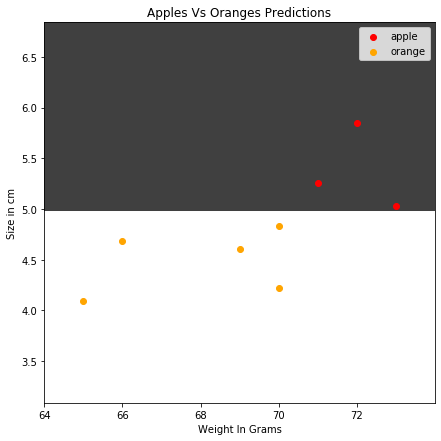

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

#Fitting the encoded data to AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost.fit(X_train,Y_train)

#Visualising
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, adaboost.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'orange'))(i), label = j)

plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()